In [1]:
entities = {'self', 'addressee', 'other'}

### 1 entity referent
* self ("me")
* addressee ("you here")
* other ("somebody else")

### 2+ entity referent
* self, addressee ("me and you here" / inclusive we)
* self, other ("me and somebody else" / exclusive we)
* addressee, addressee ("the two or more of you here")
* addressee, other ("one of you here and somebody else")
* other, other ("the two or more of them")

### 3+ entity referent
* self, addressee, addressee ("me and the two or more of you here")
* self, addressee, other ("me, one of you here, and somebody else")
* self, other, other ("me and two or more other people")
* addressee, addressee, other ("the two or more of you and somebody else")
* addressee, other, other ("one of you and two or more other people")

### 4+ entity referent
* self, addressee, addressee, other ("me, the two or more of you here, and somebody else")
* self, addressee, other, other ("me, one of you here, and two or more other people")
* addressee, addressee, other, other ("the two or more of you here and two or more other people")

### 5+ entity referent
* self, addressee, addressee, other, other ("me, the two or more of you here, and two or more other people")

There are 17 possible markers if there's no distinction between 2 entities of the same type and 3+ entities of the same type.
* a dual or trial entity number could be added to have a 3-way distinction between e.g. [other, other] and [other, other, other]
* another entity category besides self, addressee, and other could be added (invisible/divine entities)
* multiple self referents could be included (choral we)

Also, what about the issue of mis-identifying the cue as "self" rather than "addressee" (kids calling themselves "you")?

In [2]:
from itertools import combinations, combinations_with_replacement

referents = []

for i in xrange(1, len(entities) * 2):
    for combo in combinations_with_replacement(entities, i):
        
        # choral we is impossible
        if combo.count('self') > 1:
            continue
            
        # only singular vs plural
        if combo.count('addressee') > 2:
            continue
            
        if combo.count('other') > 2:
            continue
            
        # compound cues
        referent = list(combo)
        
        for j in xrange(2, len(combo) + 1):
            for compound in combinations(combo, j):
                
                if compound not in referent:
                    referent.append(compound)
            
        referents.append(referent)

In [3]:
len(referents)

17

In [4]:
referents

[['addressee'],
 ['self'],
 ['other'],
 ['addressee', 'addressee', ('addressee', 'addressee')],
 ['addressee', 'self', ('addressee', 'self')],
 ['addressee', 'other', ('addressee', 'other')],
 ['self', 'other', ('self', 'other')],
 ['other', 'other', ('other', 'other')],
 ['addressee',
  'addressee',
  'self',
  ('addressee', 'addressee'),
  ('addressee', 'self'),
  ('addressee', 'addressee', 'self')],
 ['addressee',
  'addressee',
  'other',
  ('addressee', 'addressee'),
  ('addressee', 'other'),
  ('addressee', 'addressee', 'other')],
 ['addressee',
  'self',
  'other',
  ('addressee', 'self'),
  ('addressee', 'other'),
  ('self', 'other'),
  ('addressee', 'self', 'other')],
 ['addressee',
  'other',
  'other',
  ('addressee', 'other'),
  ('other', 'other'),
  ('addressee', 'other', 'other')],
 ['self',
  'other',
  'other',
  ('self', 'other'),
  ('other', 'other'),
  ('self', 'other', 'other')],
 ['addressee',
  'addressee',
  'self',
  'other',
  ('addressee', 'addressee'),
  ('ad

Spoken English collapses these to 6 possibilities: I, you, s/he, we, you guys, they

In [5]:
def english(referents):
    # first-person
    if 'self' in referents:
        
        if 'addressee' in referents: # inclusive we
            # doesn't matter who else is being referred to
            return 'we'
        
        if 'other' in referents: # exclusive we
            # doesn't matter who else is being referred to
            return 'we'    
            
        return 'I'
    
    # second-person, if the speaker isn't included
    elif 'addressee' in referents:
        
        if referents.count('addressee') > 1: # inclusive you
            return 'you guys'
        
        if 'other' in referents: # exclusive you
            return 'you guys'
        
        return 'you'
    
    # third-person, if the addressee isn't included either
    elif 'other' in referents:
        
        if referents.count('other') > 1:
            return 'they'
        
        return 's/he'

In [6]:
english(['self', 'addressee'])

'we'

In [7]:
english(['self', 'other'])

'we'

In [8]:
english(['addressee', 'other'])

'you guys'

In [9]:
english(['addressee', 'addressee']) # also ('addressee', 'addressee') compound

'you guys'

In [10]:
import pandas

data = pandas.DataFrame()

data['Cues'] = referents
data['Outcomes'] = [english(referent) for referent in referents]
data

,Cues,Outcomes
0,[addressee],you
1,[self],I
2,[other],s/he
3,"[addressee, addressee, (addressee, addressee)]",you guys
4,"[addressee, self, (addressee, self)]",we
5,"[addressee, other, (addressee, other)]",you guys
6,"[self, other, (self, other)]",we
7,"[other, other, (other, other)]",they
8,"[addressee, addressee, self, (addressee, addre...",we
9,"[addressee, addressee, other, (addressee, addr...",you guys


Assume that the distribution of referent sets is uniform, which is probably not true.

In [11]:
import numpy

def sampler(p):
    
    def uniform():
        return numpy.random.choice(p)
    
    return uniform

referent_sampler = sampler(len(data))

In [12]:
import ndl

def activation(W):
    return pandas.DataFrame([ndl.activation(c, W) for c in data.Cues], index=data.index)

In [13]:
W = ndl.rw(data, M=100, distribution=referent_sampler)
A = activation(W)
A

,I,s/he,they,we,you,you guys
0,-0.000848,-0.004426,-0.010796,0.094586,0.051966,0.115364
1,0.038021,-0.004950,-0.012859,0.244965,-0.003339,-0.044676
2,-0.000927,0.055316,0.066743,0.114067,-0.002913,0.074110
3,-0.001350,-0.006548,-0.015506,0.147016,0.048047,0.193614
4,0.036280,-0.010656,-0.027279,0.482914,0.044615,0.028538
5,-0.002198,0.044708,0.041887,0.229084,0.045385,0.275810
6,0.036122,0.043941,0.038201,0.528713,-0.007516,-0.007599
7,-0.001687,0.048333,0.142420,0.160588,-0.004411,0.100827
8,0.035268,-0.013435,-0.033228,0.616866,0.038504,0.078863
9,-0.002760,0.039354,0.030369,0.304269,0.039766,0.394813


In [14]:
pandas.DataFrame([data['Outcomes'], A.idxmax(1), A.idxmax(1) == data['Outcomes']], 
                 index = ['Truth', 'Prediction', 'Accurate?']).T

,Truth,Prediction,Accurate?
0,you,you guys,False
1,I,we,False
2,s/he,we,False
3,you guys,you guys,True
4,we,we,True
5,you guys,you guys,True
6,we,we,True
7,they,we,False
8,we,we,True
9,you guys,you guys,True


With 100 trials, the learner is getting a lot of them right, but just by predicting 'you guys' or 'we' (if self is a referent) all of the time, since those cover most of the referent sets.

In [15]:
import sim

In [16]:
english_learning = sim.Simulation(english, data, referent_sampler, 2000)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

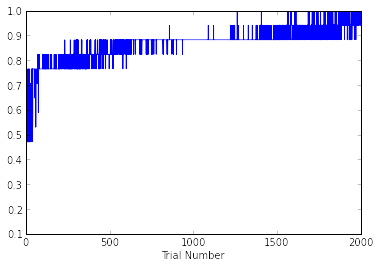

In [18]:
trajectory = [english_learning.accuracy(i) for i in xrange(1, english_learning.MAX_M)]

plt.plot(range(1, len(trajectory) + 1), trajectory, '-')
plt.xlabel('Trial Number')

In [19]:
%load_ext rpy2.ipython

%Rpush trajectory

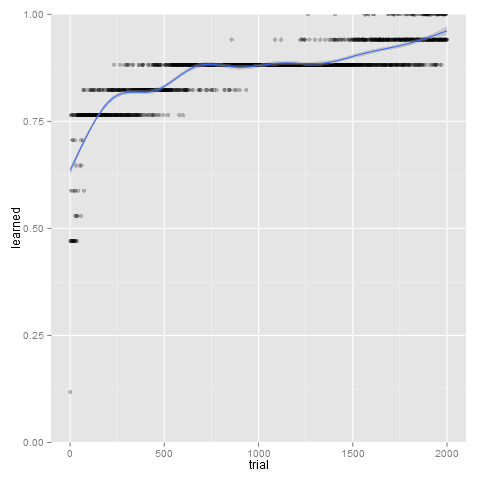

In [20]:
%%R

trajectory = data.frame(trial=1:length(trajectory), learned=trajectory)

library('ggplot2')

ggplot(trajectory, aes(trial, learned)) + 
    geom_point(alpha=0.25) + 
    stat_smooth() +
    coord_cartesian(ylim=c(0,1))